In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading the files needed for the analysis
stock_pct_reduced = pd.read_csv('Outputs/stock_pct_reduced.csv')
indices_pct = pd.read_csv('Outputs/indices_pct_clean.csv')

In [3]:
cov_matrix = stock_pct_reduced.cov()
stocks_stdev = stock_pct_reduced.std()*252**0.5

In [4]:
# Yearly returns for individual companies
annual_return_stocks = stock_pct_reduced.mean()*252

In [5]:
# Concatenating the individual stocks annual return and risk (standard deviation)
individual_stocks = pd.concat([annual_return_stocks,stocks_stdev],axis=1)
individual_stocks.columns = ['Annual Returns','Volatility']
individual_stocks

# @TODO: need to redo the csv files and simply put the prices instead of the pct change

,Annual Returns,Volatility
CVX,0.407378,0.333392
CAT,0.352928,0.330139
MRK,0.312876,0.202431
TRV,0.177172,0.231787
AMGN,0.167048,0.219640


In [6]:
# Disclaimer -- The code in this cell has been adapted from code already available in the internet

p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(stock_pct_reduced.columns)
num_portfolios = int(input ("number of portofolio runs you want to make? "))

for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets) #creates a tupple with random float 0 to 1, with a size equal to number of stocks
    weights = weights/np.sum(weights) # readjusts the weights so the summation is equal to 1.0
    p_weights.append(weights)
    returns = np.dot(weights, annual_return_stocks) # Returns are the product of individual expected returns of asset and its 
                                      # weights. this is using the dot product of vectors from linear algebra
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()# Portfolio Variance
    sd = np.sqrt(var) # Daily standard deviation
    ann_sd = sd*np.sqrt(250) # Annual standard deviation = volatility
    p_vol.append(ann_sd)
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(stock_pct_reduced.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]
portfolios  = pd.DataFrame(data)
portfolios.head() # Dataframe of the portfolios created

,Returns,Volatility,CVX weight,CAT weight,MRK weight,TRV weight,AMGN weight
0,0.229888,0.176231,0.137339,0.083070,0.089849,0.127338,0.562405
1,0.274517,0.173121,0.169968,0.145783,0.269742,0.018363,0.396144
2,0.256370,0.192104,0.042276,0.204520,0.248172,0.489442,0.015590
3,0.312647,0.215219,0.404270,0.212434,0.058778,0.037688,0.286830
4,0.294539,0.182034,0.247846,0.150812,0.262441,0.160182,0.178719


In [7]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]
# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns        0.258198
Volatility     0.162581
CVX weight     0.121175
CAT weight     0.020750
MRK weight     0.387138
TRV weight     0.169438
AMGN weight    0.301499
Name: 9571, dtype: float64

In [15]:
rf = float(input("what is the risk-free rate of returns? ")) # risk-free rate (typically Treasuries)
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
# The idxmax() method returns a Series with the index of the maximum value for each column.
# In this case it is maximizing the Sharpe Ratio, which is the formula within the iloc

optimal_risky_port.to_csv("Outputs/Optimal_risky_portfolio.csv")
optimal_risky_port

Returns        0.336170
Volatility     0.184769
CVX weight     0.260949
CAT weight     0.086227
MRK weight     0.618342
TRV weight     0.020639
AMGN weight    0.013843
Name: 6417, dtype: float64

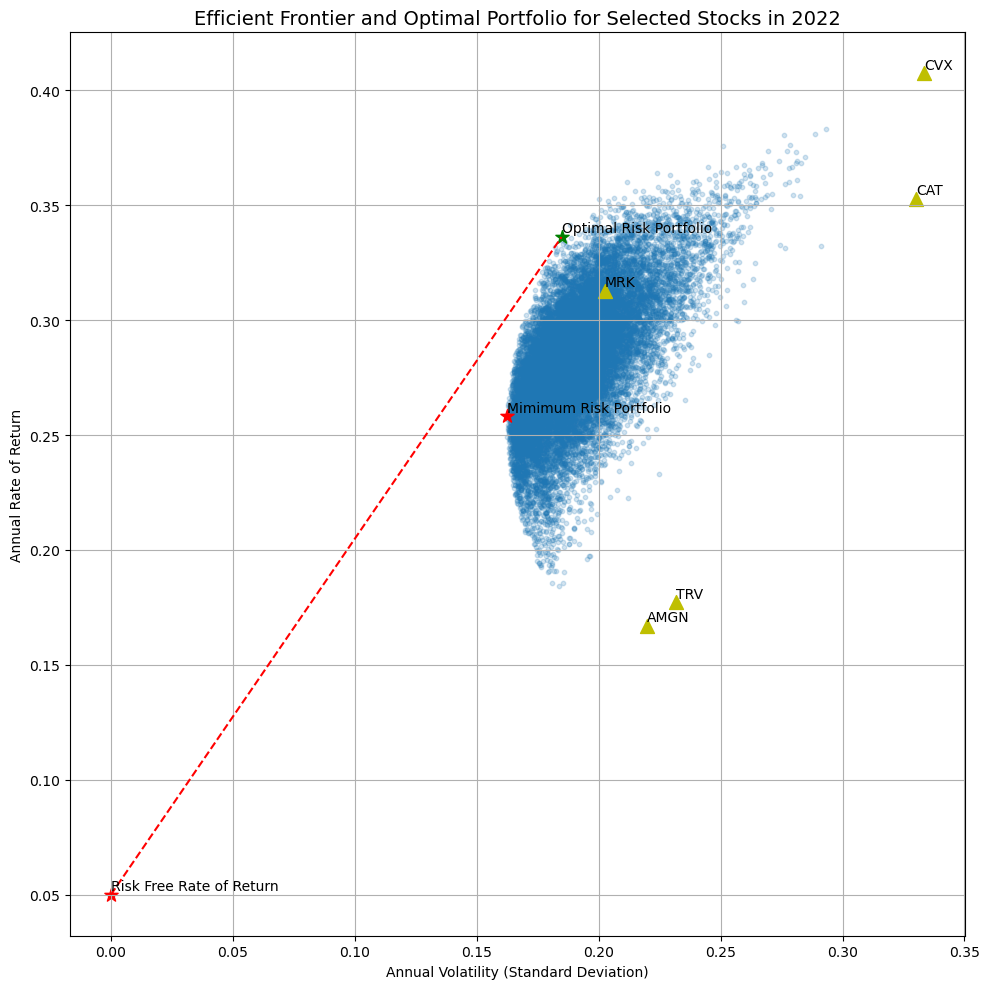

In [9]:

# Plot efficient frontier

plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.2)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=100)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=100)
plt.scatter(individual_stocks["Volatility"], individual_stocks["Annual Returns"], color='y',marker= '^', s=100)
plt.scatter(x=0, y=rf, color = 'r', marker ='*',s=100)

#Plotting the Risk Free to Optimal Portfolio line

x_values = [0, optimal_risky_port[1]]
y_values = [rf, optimal_risky_port[0]]
plt.plot(x_values, y_values, "r--")

# Embellishing the plot
plt.grid()
for i in range(len(individual_stocks)):
    plt.annotate((individual_stocks.index.to_list())[i], (individual_stocks["Volatility"].to_list()[i], individual_stocks["Annual Returns"].to_list()[i] + 0.002))
plt.annotate("Optimal Risk Portfolio", (optimal_risky_port[1], optimal_risky_port[0] + 0.002))
plt.annotate("Mimimum Risk Portfolio", (min_vol_port[1], min_vol_port[0] + 0.002))
plt.annotate("Risk Free Rate of Return", (0, rf + 0.002))
plt.xlabel("Annual Volatility (Standard Deviation)")
plt.ylabel("Annual Rate of Return")
plt.title("Efficient Frontier and Optimal Portfolio for Selected Stocks in 2022", fontsize = 14)

plt.tight_layout()

plt.savefig("Outputs/efficient_frontier.png")

plt.show()

